In [41]:
from __future__ import print_function
from __future__ import division
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

# parameters

strip_width = 0.25 / 2# mm
max_iterations = 8000 # 10k
plot_progress = 0

# geometry

x_step = 0.05 # mm
z_step = x_step # mm
x_range = 1 #
z_range = x_range # mm
#x_range = 0.1
#z_range  = 0.1



In [42]:
x_values = np.linspace((-x_range), (x_range), int(2*x_range/x_step))
z_values = np.linspace(0,(z_range), int(2*z_range/z_step))

#x_range = 1
#z_range = 1
#x_values = np.linspace((-x_range), (x_range), 6)
#z_values = np.linspace((-z_range),(z_range), 6)


#detector_array = np.zeros((len(x_values),len(z_values)), dtype=np.float)
detector_array  = [[0 for x in range(len(x_values))] for z in range(len(z_values))] 
detector_array  = np.zeros((len(x_values),len(z_values)))
#print(detector_array)


In [43]:
# strip edges
high_edge = 0
low_edge = 0
high = []
low = []

#print(x_values)
#print(z_values)

for x_value in x_values:
    if float(x_value) >= float(strip_width/2):
        high.append(x_value)
    if float(x_value) <= float(-strip_width/2):
        low.append(x_value)

In [44]:
high_strip_edge = min(high)
low_strip_edge = max(low)
high_index = np.where(x_values == high_strip_edge)
low_index = np.where(x_values == low_strip_edge)
#x_values = []
#x_values = np.linspace((-x_range), (x_range), (4*x_range/x_step))
#high_index = x_values.index(high_strip_edge)
#low_index = x_values.index(low_strip_edge)
high_index = int(high_index[0][0])
low_index = int(low_index[0][0])
#low_index  = low_index + 1
print(high_index)
print(low_index)

21
18


In [45]:
# ?????????????????????????????????
max_x = len(x_values)
#min_x = min(x_values)
max_z = len(z_values)
#min_z = min(z_values)

# boundary conditions
old = 1
new = 0
##wp = [[[0 for z in range(2)] for x in range(max_x)] for z in range(max_z)]
#print(wp)
wp = np.zeros((2, len(x_values), len(z_values)))
#wp[:,:,:] =3
wp[0,max_x - 1 ,] = 0
wp[1,max_x - 1 ,] = 0
wp[1,0,] = 0
wp[0,0,] = 0

wp[0,low_index:(high_index+1),len(z_values) - 1] = 1 #high index +1 TODO
wp[1,low_index:(high_index+1),len(z_values) - 1] = 1
wp[0,:,0] = 0
wp[1,:,0] = 0

#wp[0:0, low_index:] = 0 
#wp[0:high_index, :] = 0
#wp[1:0, low_index:] = 0
#wp[1:high_index, :] = 0
print(wp)

[[[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]

 [[ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  ..., 
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]
  [ 0.  0.  0. ...,  0.  0.  0.]]]


In [46]:
for x in range(1, (max_x - 1)):
    for z in range(1, (max_z - 1)):
        wp[0,x,z] = 1.0 * abs(z/max_z) * abs(x/max_x)
        
print(wp)

[[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   6.25000000e-04   1.25000000e-03 ...,   2.31250000e-02
     2.37500000e-02   0.00000000e+00]
  [  0.00000000e+00   1.25000000e-03   2.50000000e-03 ...,   4.62500000e-02
     4.75000000e-02   0.00000000e+00]
  ..., 
  [  0.00000000e+00   2.31250000e-02   4.62500000e-02 ...,   8.55625000e-01
     8.78750000e-01   0.00000000e+00]
  [  0.00000000e+00   2.37500000e-02   4.75000000e-02 ...,   8.78750000e-01
     9.02500000e-01   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]]

 [[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
     0.00000000e+00   0.00000000e+00]
  [  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
  

In [47]:
print("Calculating Weighting Potential via Relaxation....")
dif_store = np.zeros((max_iterations))

for iter in range(0,max_iterations):
    if (old == 0):
        old = 1
        new = 0
    else:
        old = 0
        new = 1
        
    sum_dif = 0
    max_dif = 0

    # reflection symm
    ## w(1,end,:) = w(1,end-1,:); ??

    # loop over internal points of detector grid
    for z in range(1, wp.shape[2] - 1): # X and Y ????
        #print (x)
        for x in range(1, wp.shape[1]-1):
            #print(y)
           
            # new value is average over neigbouring pixels
            wp[new,x,z] = (wp[old,x+1,z] + wp[old,x-1,z] + wp[old,x,z+1] + wp[old,x,z-1]) / 4
        
            # difference in solution between iterations
            dif = wp[old,x,z] - wp[new,x,z]
            if (dif < 0.0):
                dif = -dif
            sum_dif = sum_dif +  dif
            if (max_dif < dif):
                max_dif = dif

    # check for convergence
    if (max_dif < 1e-12):
        print("Solution may have converged...")
        continue
        #return
    
    # store difference vs. iteration
    dif_store[iter] = sum_dif
    
    # plot intermediate results
    if (plot_progress == 1):
        if ((iter%100) == 0):
            print(iter)
            print(sum_dif)
            plt.subplot(1,2,1)
            contour(np.squeeze(wp[old,:,:]),20)
            plt.subplot(1,2,2)
            contour(np.squeeze(wp[new,:,:]),20)

# get final result
WPout = np.squeeze(wp[0,:,0:max_z]); ##max_z bit

print("DONE")
print(WPout)

Calculating Weighting Potential via Relaxation....
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have c

Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution

Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution

Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution

Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution

Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution may have converged...
Solution

In [48]:
#plo
print(len(x_values))
print(len(z_values))
print(WPout)

print((WPout.shape[0]))
print((WPout.shape[1]))

plt.cla() 
plt.clf() 

#plt.style.use('seaborn-white')

fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
ax.yaxis.tick_right()
#plt.contour(z_values,20)
###plt.contour(z_values, x_values, WPout, 50)


#plt.plot(z_values, WPout[0])
contours = plt.contour(z_values, x_values, WPout, 20, cmap='viridis')
#plt.clabel(contours, inline=True, fontsize=8)

#CS = plt.contourf(X, Y, Z, 10, cmap=plt.cm.bone, origin=origin)

#plt.imshow(z_values, origin='lower', cmap='RdGy')
plt.colorbar();

#ax.set_xlim(13,16)

plt.figure(figsize=(10, 5))
plt.semilogy(dif_store,'b.-')


40
40
[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.00011299  0.00022662 ...,  0.00132911  0.00067607  0.        ]
 [ 0.          0.00022535  0.00045197 ...,  0.00270233  0.00137516  0.        ]
 ..., 
 [ 0.          0.00022535  0.00045197 ...,  0.00270233  0.00137516  0.        ]
 [ 0.          0.00011299  0.00022662 ...,  0.00132911  0.00067607  0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]
40
40


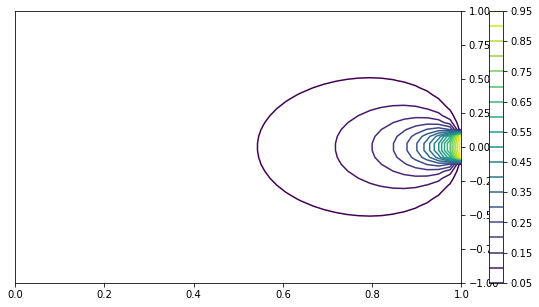

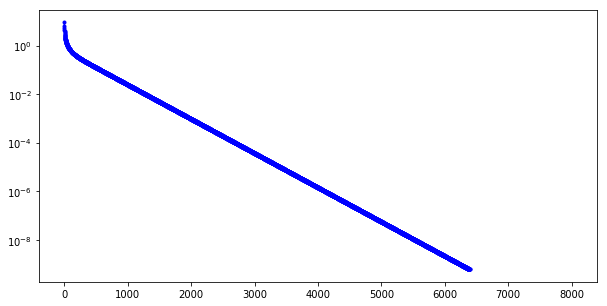

In [49]:
plt.show()

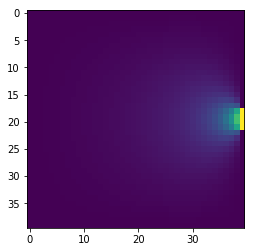

In [51]:
plt.imshow(WPout)
plt.show()